# Kaggle Digit Recognizer using CNN

First let us import required modules,

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D, Conv2D, Dense, Flatten, Dropout
from matplotlib import pyplot as plt

E:\software\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Now load train and test data,

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

Y_train=train['label'].values
# obtain output class, total of 10 classes
num_class=len(set(Y_train))

We need to implement one-hot manipulation for categorical targets,

In [3]:
y_train=np.zeros((Y_train.size, Y_train.max()+1))
y_train[np.arange(Y_train.size),Y_train]=1

y_train.shape

(42000, 10)

Obtain 'x_train' data with the original shape of [:, 784], reshape the data to [:,28,28] and normalized the value by dividing 255,

In [4]:
x_train=train.drop(columns='label').values
x_train=np.reshape(x_train,(x_train.shape[0],28,28,1))/255

x_train.shape

(42000, 28, 28, 1)

Load, reshape and normalize test data,

In [5]:
X_test=test.values
X_test=np.reshape(X_test,(X_test.shape[0],28,28,1))

x_test=X_test/255

Define CNN models (here a two-layer CNN is used, no need to be complicated),

In [6]:
# model parameters
filters1=64
filters2=32
kernel_size=(3,3)

# start building models
model=Sequential()
model.add(Conv2D(filters=filters1,kernel_size=kernel_size,padding='same', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.7))

model.add(Conv2D(filters=filters2,kernel_size=kernel_size,padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.7))

model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.7))
model.add(Dense(num_class,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# check model structure
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
__________

Train the above CNN model, a validation_split of 0.2 is used,

In [7]:
model.fit(x=x_train,y=y_train,batch_size=128,epochs=30,validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 55s 2ms/step - loss: 1.1567 - acc: 0.6062 - val_loss: 0.3175 - val_acc: 0.9075
Epoch 2/30
33600/33600 [==============================] - 49s 1ms/step - loss: 0.5194 - acc: 0.8344 - val_loss: 0.1868 - val_acc: 0.9464
Epoch 3/30
33600/33600 [==============================] - 48s 1ms/step - loss: 0.4083 - acc: 0.8719 - val_loss: 0.1504 - val_acc: 0.9557
Epoch 4/30
33600/33600 [==============================] - 48s 1ms/step - loss: 0.3535 - acc: 0.8917 - val_loss: 0.1151 - val_acc: 0.9652
Epoch 5/30
33600/33600 [==============================] - 49s 1ms/step - loss: 0.3240 - acc: 0.9000 - val_loss: 0.1057 - val_acc: 0.9680
Epoch 6/30
33600/33600 [==============================] - 48s 1ms/step - loss: 0.3038 - acc: 0.9074 - val_loss: 0.0967 - val_acc: 0.9701
Epoch 7/30
33600/33600 [==============================] - 49s 1ms/step - loss: 0.2865 - acc: 0.9117 - val_loss: 0.0805 - val_acc:

Predict test data,

In [8]:
# prediction
y_test=model.predict(x_test)
# obtain the digit number from the max. of softmax output
y2_test=np.argmax(y_test,axis=1)

Define a custom plot function to plot 9 of the test images with corresponding predictions,

In [9]:
def plotimg(images,labels):
    assert len(images)==len(labels)==9
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i],cmap='gray')
        plt.xlabel('prediction is: '+str(labels[i]))
    plt.show()

See the predictions for random 9 test data,

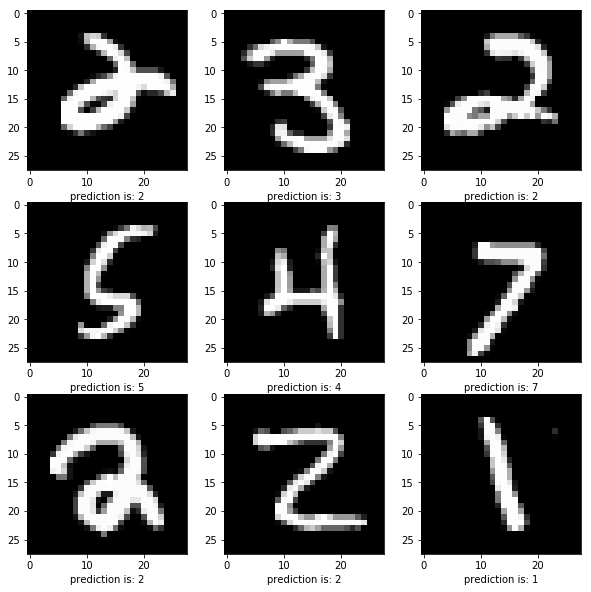

In [14]:
rand_idx=np.random.choice(np.arange(len(y2_test)), 9)
plotimg(X_test[rand_idx,:,:,0],y2_test[rand_idx])

Save prediction data to file,

In [15]:
ids=[i for i in range(1,len(y_test)+1)]
data=pd.DataFrame({'ImageId':ids, 'Label':y2_test})
data.to_csv('submission.csv',index=False)